Initial attempt at saving the image from ChromeDino so that we can then try and make use of the game environment

In [2]:
import re
import time
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm, tnrange
import numpy as np
from collections import defaultdict,Counter
from scipy.misc import imread, imsave

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException

import pandas as pd
import base64
import io
from PIL import Image

from matplotlib import pyplot as plt, rcParams
from matplotlib import cm
%matplotlib inline
rcParams["figure.figsize"] = (16,12)    # Use this line to increase your figure size (optional).

# Option 2
Force Selenium to execute JavaScript to just pull the information out of the canvas tag.

In [21]:
def detect_object(img):
    x,y = np.shape(img)
    dino = img[x//2:,:x//2] #prob don't need this
    close = img[x//2:,x//2:x+30]
    return np.mean(close)
    print("Calculated {}",np.mean(close))

js_call = "return document.getElementsByClassName('runner-canvas')[0].toDataURL('image/png').substring(21);"
url = "https://chromedino.com/"
browser = webdriver.Chrome()
try:
    browser.get(url)

    body = browser.find_element_by_id('t')
    body.send_keys(Keys.ARROW_UP)
    prev_jump = None
    values = []
    while True:
        time.sleep(.15)
        b64_image = browser.execute_script(js_call)
        image = base64.b64decode(b64_image)
        buf = io.BytesIO(image)
        img = Image.open(buf).convert('LA')
        np_img = np.array(img)[:,:,0]
        new_jump = detect_object(np_img)
        if prev_jump == new_jump and new_jump > 2:
            body.send_keys(Keys.ARROW_UP)
            values.append((-1,"NEW"))
        elif new_jump > 3:
            values.append((new_jump,"J"))
            body.send_keys(Keys.ARROW_UP)
        else:
            values.append((new_jump,"N"))
        prev_jump = new_jump
except Exception as e:
    print("Errored out at step 1", e)
finally:
    browser.close() #make sure we close it when we are finished.

Errored out at step 1 Message: chrome not reachable
  (Session info: chrome=61.0.3163.100)
  (Driver info: chromedriver=2.33.506120 (e3e53437346286c0bc2d2dc9aa4915ba81d9023f),platform=Windows NT 10.0.15063 x86_64)



WebDriverException: Message: chrome not reachable
  (Session info: chrome=61.0.3163.100)
  (Driver info: chromedriver=2.33.506120 (e3e53437346286c0bc2d2dc9aa4915ba81d9023f),platform=Windows NT 10.0.15063 x86_64)


In [81]:
def find_cacti(img):
    height,width = np.shape(img)
    dino = img[height//2:,:height//2]
    vision = round(height*.8)
    field = img[vision,height//2 - width//30 - 5:]
    distance = []
    cacti_width = []
    prev_pixel = field[0]
    cur_dist = 0
    cur_width = 0
    for pixel in field:
        if prev_pixel == 0 and pixel != 0:
            distance.append(cur_dist)
            cur_dist = 0
        if prev_pixel != 0 and pixel == 0:
            cacti_width.append(cur_width)
            cur_width = 0
        if pixel == 0:
            cur_dist += 1
        else:
            cur_width += 1
        prev_pixel = pixel
    cacti_width = cacti_width[1:]
    return distance, cacti_width
    #print(img[vision,-height//2 - width//30 - 5:])

js_call = "return document.getElementsByClassName('runner-canvas')[0].toDataURL('image/png').substring(21);"
url = "https://chromedino.com/"
browser = webdriver.Chrome()
try:
    browser.get(url)

    body = browser.find_element_by_id('t')
    body.send_keys(Keys.ARROW_UP)
    prev_dist = None
    prev_width = None
    values = []
    while True:
        time.sleep(.0015)
        b64_image = browser.execute_script(js_call)
        image = base64.b64decode(b64_image)
        buf = io.BytesIO(image)
        img = Image.open(buf).convert('LA')
        np_img = np.array(img)[:,:,0]
        distances, widths = find_cacti(np_img)
        #print(distances,widths)
        if len(values) > 35:
            if values[-1] == distances and values[-2] == distances and values[-3] == distances and values[-10] == distances:
                print("GAME OVER")
                break
                #body.send_keys(Keys.ARROW_UP)
                values.append((-1,"NEW"))
            elif len(distances) != 0:
                if distances[0] < 80:
                    values.append((distances,widths,"J"))
                    #body.send_keys(Keys.ARROW_UP)
            else:
                values.append((distances,widths,"N"))
        else:
            values.append((distances,widths,"N"))
        prev_dist, prev_width = distances, widths
except Exception as e:
    print("Errored out at step 1", e)
finally:
    browser.close() #make sure we close it when we are finished.

Errored out at step 1 argument should be a bytes-like object or ASCII string, not 'NoneType'


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=61.0.3163.100)
  (Driver info: chromedriver=2.33.506120 (e3e53437346286c0bc2d2dc9aa4915ba81d9023f),platform=Windows NT 10.0.15063 x86_64)


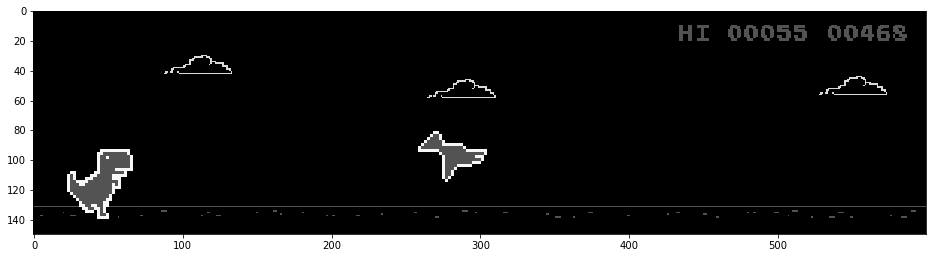

In [85]:
bird_img = np_img
plt.imshow(bird_img, cmap=cm.gray)

In [78]:
def find_cacti(img):
    height,width = np.shape(img)
    dino = img[height//2:,:height//2]
    vision = round(height*.8)
    field = img[vision,height//2 - width//30 - 5:]
    distance = []
    cacti_width = []
    prev_pixel = field[0]
    cur_dist = 0
    cur_width = 0
    for pixel in field:
        if prev_pixel == 0 and pixel != 0:
            distance.append(cur_dist)
            cur_dist = 0
        if prev_pixel != 0 and pixel == 0:
            cacti_width.append(cur_width)
            cur_width = 0
        if pixel == 0:
            cur_dist += 1
        else:
            cur_width += 1
        prev_pixel = pixel
    cacti_width = cacti_width[1:]
    return distance, cacti_width
    #print(img[vision,-height//2 - width//30 - 5:])

js_call = "return document.getElementsByClassName('runner-canvas')[0].toDataURL('image/png').substring(21);"
url = "https://chromedino.com/"
browser = webdriver.Chrome()
try:
    browser.get(url)

    body = browser.find_element_by_id('t')
    body.send_keys(Keys.ARROW_UP)
    prev_dist = None
    prev_width = None
    values = []
    while True:
        time.sleep(.0015)
        b64_image = browser.execute_script(js_call)
        image = base64.b64decode(b64_image)
        buf = io.BytesIO(image)
        img = Image.open(buf).convert('LA')
        np_img = np.array(img)[:,:,0]
        distances, widths = find_cacti(np_img)
        print(distances,widths)
        if len(values) > 35:
            if values[-1] == distances and values[-2] == distances and values[-3] == distances and values[-10] == distances:
                print("GAME OVER")
                break
                #body.send_keys(Keys.ARROW_UP)
                values.append((-1,"NEW"))
            elif len(distances) != 0:
                if distances[0] < 80:
                    values.append((distances,widths,"J"))
                    body.send_keys(Keys.ARROW_UP)
            else:
                values.append((distances,widths,"N"))
        else:
            values.append((distances,widths,"N"))
        prev_dist, prev_width = distances, widths
except Exception as e:
    print("Errored out at step 1", e)
finally:
    browser.close() #make sure we close it when we are finished.

[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[522] []
[511] []
[500] []
[489] []
[478] []
[461] []
[450] []
[439] []
[422] []
[411] []
[394] []
[382] []
[370] []
[358] []
[340] []
[329] []
[317] []
[300] []
[288] []
[276] []
[259] []
[247, 257] [19]
[236, 257] [19]
[225, 257] [19]
[214, 257] [19]
[203, 257] [19]
[185, 257] [19]
[173, 257] [19]
[162, 257] [19]
[150, 257] [19]
[

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=61.0.3163.100)
  (Driver info: chromedriver=2.33.506120 (e3e53437346286c0bc2d2dc9aa4915ba81d9023f),platform=Windows NT 10.0.15063 x86_64)


In [88]:
def find_cacti(img):
    height,width = np.shape(img)
    dino = img[height//2:,:height//2]
    vision = round(height*.8)
    field = img[vision,height//2 - width//30 - 5:]
    distance_to_cacti = []
    cacti_width = []
    prev_pixel = field[0]
    cur_dist = 0
    cur_width = 0
    for pixel in field:
        if prev_pixel == 0 and pixel != 0:
            distance_to_cacti.append(cur_dist)
            cur_dist = 0
        if prev_pixel != 0 and pixel == 0:
            cacti_width.append(cur_width)
            cur_width = 0
        if pixel == 0:
            cur_dist += 1
        else:
            cur_width += 1
        prev_pixel = pixel
    cacti_width = cacti_width[1:]
    #print(distance_to_cacti, cacti_width)
    #print(img[vision,height//2 - width//30 - 5:])
    #plt.imshow(dino, cmap=cm.gray)

In [89]:
find_cacti(np_img)

In [96]:
def find_bird(img):
    plt.imshow(img, cmap=cm.gray)

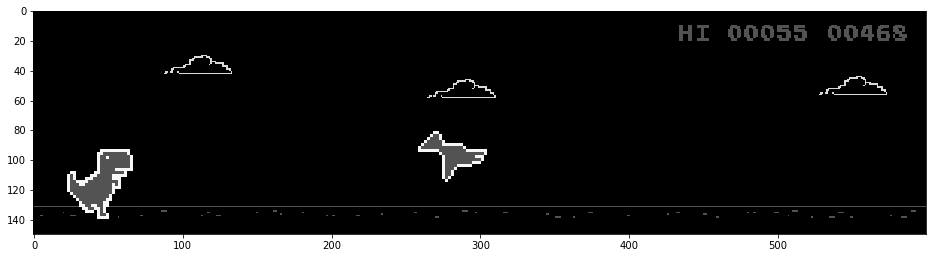

In [97]:
find_bird(bird_img)